# Telecom Customer Churn
This dataset comes from an Iranian telecom company, with each row representing a customer over a year period. Along with a churn label, there is information on the customers' activity, such as call failures and subscription length. 
 Dataset from Datacamp

In [1]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     / 22.1 MB 23.2 MB/s 0:00:02
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 KB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 KB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 81.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 KB 28.0 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=344582 sha256=b23a83570fb2ac5d10b2170a53e06ff99a3d3773e537e30d7a1e692d046482e2
  Stored in directory: /tmp/pip-ephem-wheel-cache-t1926apr/wheels/64/b6/85/dfc808b23666a5910371784e349d28818006ff63ed9cfeca59
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sh

In [2]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport as pdp
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


<ipython-input-2-ed05c3fe89e0>:3: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport as pdp


In [3]:
df = pd.read_csv("customer_churn.csv")

In [4]:
df.head()

Call Failure  Complains  Subscription Length  Charge Amount  \
0             8          0                   38              0   
1             0          0                   39              0   
2            10          0                   37              0   
3            10          0                   38              0   
4             3          0                   38              0   

   Seconds of Use  Frequency of use  Frequency of SMS  \
0            4370                71                 5   
1             318                 5                 7   
2            2453                60               359   
3            4198                66                 1   
4            2393                58                 2   

   Distinct Called Numbers  Age Group  Tariff Plan  Status  Age  \
0                       17          3            1       1   30   
1                        4          2            1       2   25   
2                       24          3            1       1   30   
3                       35          1            1       1   15   
4                       33          1            1       1   15   

   Customer Value  Churn  
0         197.640      0  
1          46.035      0  
2        1536.520      0  
3         240.020      0  
4         145.805      0

In [5]:
df.isnull().sum()

Call Failure               0
Complains                  0
Subscription Length        0
Charge Amount              0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call Failure             3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription Length      3150 non-null   int64  
 3   Charge Amount            3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(13)

In [7]:
pdp(pd.read_csv('customer_churn.csv'))

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
f_df = df.groupby(["Age Group"])['Frequency of SMS','Frequency of use'].sum()

<ipython-input-8-2d8cd7da73e0>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  f_df = df.groupby(["Age Group"])['Frequency of SMS','Frequency of use'].sum()


In [9]:
df['call_duration_group'] = pd.cut(df['Seconds of Use'], bins = 3, labels = ('short','medium','long'))
df

Call Failure  Complains  Subscription Length  Charge Amount  \
0                8          0                   38              0   
1                0          0                   39              0   
2               10          0                   37              0   
3               10          0                   38              0   
4                3          0                   38              0   
...            ...        ...                  ...            ...   
3145            21          0                   19              2   
3146            17          0                   17              1   
3147            13          0                   18              4   
3148             7          0                   11              2   
3149             8          1                   11              2   

      Seconds of Use  Frequency of use  Frequency of SMS  \
0               4370                71                 5   
1                318                 5                 7   
2               2453                60               359   
3               4198                66                 1   
4               2393                58                 2   
...              ...               ...               ...   
3145            6697               147                92   
3146            9237               177                80   
3147            3157                51                38   
3148            4695                46               222   
3149            1792                25                 7   

      Distinct Called Numbers  Age Group  Tariff Plan  Status  Age  \
0                          17          3            1       1   30   
1                           4          2            1       2   25   
2                          24          3            1       1   30   
3                          35          1            1       1   15   
4                          33          1            1       1   15   
...                       ...        ...          ...     ...  ...   
3145                       44          2            2       1   25   
3146                       42          5            1       1   55   
3147                       21          3            1       1   30   
3148                       12          3            1       1   30   
3149                        9          3            1       1   30   

      Customer Value  Churn call_duration_group  
0            197.640      0               short  
1             46.035      0               short  
2           1536.520      0               short  
3            240.020      0               short  
4            145.805      0               short  
...              ...    ...                 ...  
3145         721.980      0              medium  
3146         261.210      0              medium  
3147         280.320      0               short  
3148        1077.640      0               short  
3149         100.680      1               short  

[3150 rows x 15 columns]

In [10]:
call_duration_df = df.groupby(['Age Group','call_duration_group'], as_index = False)['Frequency of use'].sum()

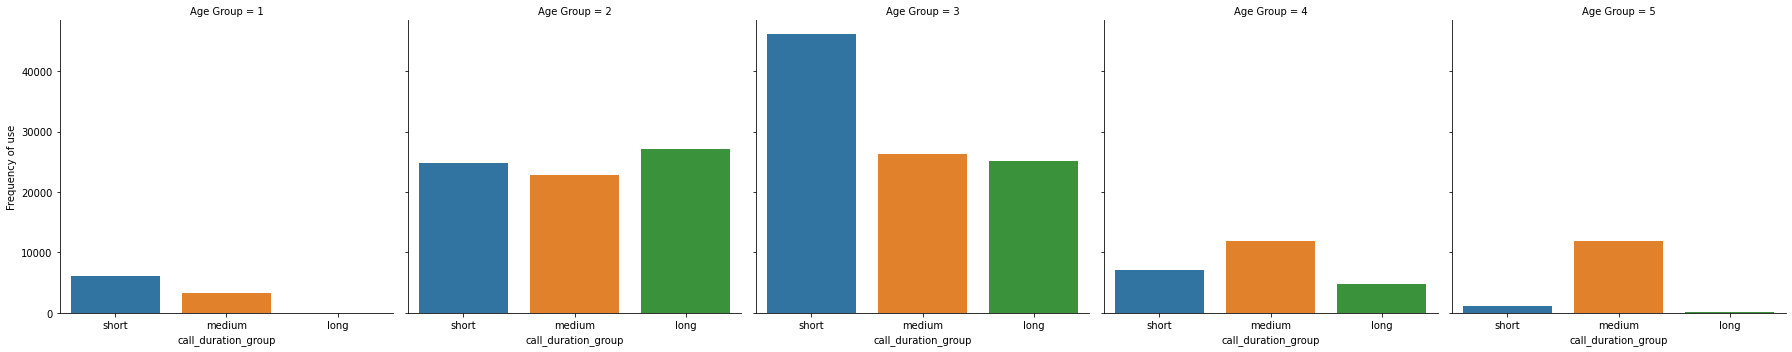

In [11]:
sns.catplot(x='call_duration_group',y = 'Frequency of use', data = call_duration_df, col = 'Age Group', kind = 'bar' )
plt.ylabel("Frequency of Use (Seconds)")
plt.show()

## Data Dictionary
| Column                  | Explanation                                             |
|-------------------------|---------------------------------------------------------|
| Call Failure            | number of call failures                                 |
| Complains               | binary (0: No complaint, 1: complaint)                  |
| Subscription Length     | total months of subscription                            |
| Charge Amount           | ordinal attribute (0: lowest amount, 9: highest amount) |
| Seconds of Use          | total seconds of calls                                  |
| Frequency of use        | total number of calls                                   |
| Frequency of SMS        | total number of text messages                           |
| Distinct Called Numbers | total number of distinct phone calls                    |
| Age Group               | ordinal attribute (1: younger age, 5: older age)        |
| Tariff Plan             | binary (1: Pay as you go, 2: contractual)               |
| Status                  | binary (1: active, 2: non-active)                       |
| Age                     | age of customer                                         |
| Customer Value          | the calculated value of customer                        |
| Churn                   | class label (1: churn, 0: non-churn)                    |

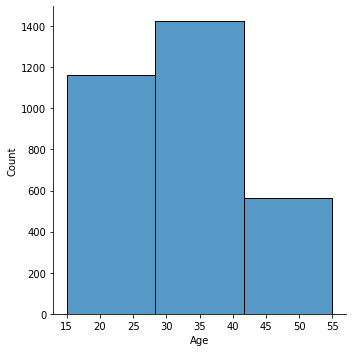

In [12]:
sns.displot(data=df, x = 'Age', bins = 3)

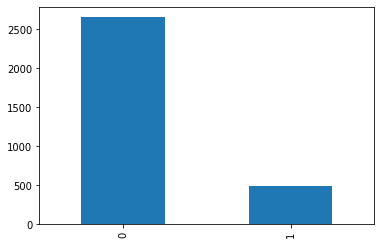

In [13]:
df.Churn.value_counts().plot(kind='bar')

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold, train_test_split

In [15]:
X = df.drop(['Churn','call_duration_group'], axis = 1).values
y = df['Churn'].values

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics

In [19]:
models = {'KNN': KNeighborsClassifier(),'Logistic Regression': LogisticRegression(),
          'DecisionTree':DecisionTreeClassifier(),'Random Forest': RandomForestClassifier(),
          'SVM':SVC()}

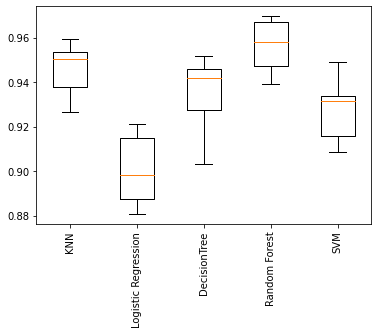

In [20]:
results = []
for model in models.values():
  kf = KFold(n_splits=6, random_state = 42, shuffle = True)
  cv_results = cross_val_score(model,X_train_scaled, y_train, cv = kf)
  results.append(cv_results)
plt.boxplot(results,labels = models.keys())
plt.xticks(rotation = 90)
plt.show()

In [21]:
for name, model in models.items():
  model.fit(X_train_scaled, y_train)
  test_score = model.score(X_test_scaled, y_test)
  print('{} Test Set Accuracy: {}'.format(name, test_score))

KNN Test Set Accuracy: 0.9365482233502538
Logistic Regression Test Set Accuracy: 0.8769035532994924
DecisionTree Test Set Accuracy: 0.932741116751269
Random Forest Test Set Accuracy: 0.9428934010152284
SVM Test Set Accuracy: 0.9010152284263959


# IF NOT SCALED
As we can see from this confusion matrix, even though the accuracy for the RandomForestClassifier is 94% on the test set. 
There are a lot of False Postive values which is shown by the top-right column of the confusion matrix.
This is due to not training on the scaled X train data.

In [26]:
nsmodel = RandomForestClassifier()
nsmodel.fit(X_train, y_train)

RandomForestClassifier()

In [27]:
from sklearn.metrics import confusion_matrix
y_pred = nsmodel.predict(X_test_scaled)
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[100, 545],
       [ 64,  79]])

# AFTER SCALING
The number of False Positives dropped down by a lot after training and predicted on the scaled train and test data.

In [24]:
nmodel = RandomForestClassifier()
nmodel.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [25]:
from sklearn.metrics import confusion_matrix
y_pred = nmodel.predict(X_test_scaled)
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[632,  13],
       [ 32, 111]])

[Source](https://www.kaggle.com/royjafari/customer-churn)  of dataset and [source](https://archive.ics.uci.edu/ml/datasets/Iranian+Churn+Dataset) of dataset description. 

**Citation**: Jafari-Marandi, R., Denton, J., Idris, A., Smith, B. K., & Keramati, A. (2020). Optimum Profit-Driven Churn Decision Making: Innovative Artificial Neural Networks in Telecom Industry. Neural Computing and Applications.